AMUSE tutorial on modules and channels
====================

AMUSE is composed of domain-specific modules (i.e. the physics modules), which are often written in some native compiled language, and data-handling.
The latter tends to be confusing for novel users.
Data representation in AMUSE is often replicated.
So there can be a parameter *mass* to indicate a property of a star in a stellar-evolution code, in a gravitational dynamics code and in your user script. These three parameters *mass* can mean the same, or they can have a different meaning. This makes running amuse somewhat confusing at times.
Here we show how to formally separate these data streams.

But first we will enter the realm of modules.

In [1]:
#Load in the amuse units module, the particle module and 
# some generator for producing some conditions.
from amuse.units import units, constants
from amuse.lab import Particles

We now want to generate the Solar system, as it was observed on April 5th 2063 using the [JPL emphemeris](https://ssd.jpl.nasa.gov/horizons.cgi#top).
Let's start with the inner most planet, Mercury, in the Sun's barycenter, which gives the following output:

*******************************************************************************
$$SOE
2474649.500000000 = A.D. 2063-Apr-05 00:00:00.0000 TDB 
 X =-2.689701945882702E-01 Y = 1.947622508089924E-01 Z = 4.148911797144442E-02
 VX=-2.230751806031045E-02 VY=-2.157655548570704E-02 VZ= 2.791759037949523E-04
 LT= 1.932846451835678E-03 RG= 3.346619889187973E-01 RR= 5.406475142917982E-03
 
We can use these to start an AMUSE particle set, as follows

In [2]:
Sun = Particles(1)
Sun.mass = 1 | units.MSun
Sun.position = (0,0,0) | units.km
Sun.velocity = (0,0,0) | units.km/units.s
planets = Particles(8)
planets[0].mass = 3.302e+23 | units.kg # also according to JPL)
planets[0].position = (-2.689701945882702E-01,
                       1.947622508089924E-01,
                       4.148911797144442E-02) | units.au
planets[0].velocity = (-2.230751806031045E-02,
                       -2.157655548570704E-02,
                       2.791759037949523E-04) | units.au/units.yr

And continue doing this for the other 7 planets.
Then add the Sun and we have the Solar system's particle set.
It would be easier if there is a handy routine with the same effect, in particular because we will frequently be using the Solar system as some sort of template for a rather typical planetary system, or for specifically sutdying this planetary system. We therefore have a handy routine that allows us to initialize the Solar system.

In [3]:
from amuse.ext.solarsystem import new_solar_system
sun_and_planets = new_solar_system()
#sun_and_planets = sun_and_planets[0].as_set()
print(sun_and_planets)

|S8
                 key         mass         name       radius           vx           vy           vz            x            y            z
                   -         MSun         none         RSun       km / s       km / s       km / s           AU           AU           AU
====================  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========
 5055892504180612930    1.000e+00          SUN    1.000e+00   -1.874e-03   -1.560e-02    1.104e-04   -8.354e-03    1.923e-03    2.145e-04
 1473795989910820520    1.660e-07      MERCURY    5.654e-03    1.032e+01   -4.214e+01   -4.388e+00   -3.923e-01   -1.749e-01    2.101e-02
12836918243487594011    2.448e-06        VENUS    1.403e-02   -1.704e+01    3.049e+01    1.401e+00    6.251e-01    3.518e-01   -3.157e-02
11487249187515533092    3.040e-06     EARTHMOO    1.482e-02    2.844e+01    6.966e+00    1.301e-04    2.337e-01   -9.855e-01    2.100e-04
   75200665675600793    3.227e

We adopted the module `ext.new_solar_system` to generate a ready-made solar system. You can also make a solar system that includes it's moons. For this you will have to use the routine 
'new_lunar_system', which is a module from the 'amuse.ic.solar_system_moons' package.

Now you can plot the positions of the sun and planets in the orbital plane.

In 1984  
[Whitemire and Jackson](https://ui.adsabs.harvard.edu/abs/1984Natur.308..713W/abstract) and [Davies et al 1984](
https://ui.adsabs.harvard.edu/abs/1984Natur.308..715D)([preprint](https://escholarship.org/uc/item/9gm5c682)) argued that the Solar system was orbited by a hypothetical star called nemesis, named after the goddess
of Rhamnous who punished those who did not honor the Olympians.

This companion to the Sun would have an orbital separation of about 95,000 au, and due to its interaction with the Oort cloud would initiate periodic comet shouwers in the inner Solar system; punishing life on Earth for being atheistic?

Let's adopt the Solar system as we have just initialized and add Nemesis as an 0.2MSun main-sequence star in a 95,000 au orbit with an eccentricity of 0.7.

Let's construct tha binary system of the Sun (without planets) and Nemesis.

In [4]:
msun = sun_and_planets.mass.sum()
mnemesis = 0.2 | units.MSun
a = 95000 | units.au
e = 0.7
from amuse.ext.orbital_elements import new_binary_from_orbital_elements
sun_and_nemesis = new_binary_from_orbital_elements(msun, mnemesis, 
                                          a, e, G=constants.G)
setattr(sun_and_nemesis, "name", ["Companion", "Nemesis"])
print(sun_and_nemesis)

                 key         mass         name           vx           vy           vz            x            y            z
                   -         MSun         none  3646245880.3572216 * m * s**-1  3646245880.3572216 * m * s**-1  3646245880.3572216 * m * s**-1  149597870691.0 * m  149597870691.0 * m  149597870691.0 * m
====================  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========
 8426092045493863928    1.001e+00    Companion    0.000e+00   -1.151e-08   -0.000e+00   -4.745e+03   -0.000e+00   -0.000e+00
    6793584129451155    2.000e-01      Nemesis    0.000e+00    5.764e-08    0.000e+00    2.376e+04    0.000e+00    0.000e+00
====================  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========


Now, the sun in this binary-particle set and the sun in the Solar system particle-set do not have the same position.

In [5]:
sun = sun_and_planets[sun_and_planets.name=="SUN"]
print(sun.position.in_(units.au))
print(sun_and_nemesis[sun_and_nemesis.mass>0.9|units.MSun].position.in_(units.au))

[[-0.00835408821766, 0.0019229394648, 0.000214547107396]] au
[[-4744.69448798, -0.0, -0.0]] au


And, equally they will have different velocity.

However, we would like to adot these binary parameters for the Sun-Nemesis binary system. For this, we first move the entire Solar system to the Sun barycenter, move it to Nemesis' companion and add Nemesis.

In [6]:
sun_and_planets.position -= sun.position
sun_and_planets.velocity -= sun.velocity
companion = sun_and_nemesis[sun_and_nemesis.name=="Companion"]
nemesis = sun_and_nemesis[sun_and_nemesis.name=="Nemesis"]
sun_and_planets.position += companion.position
sun_and_planets.velocity += companion.velocity
sun_and_planets.add_particle(sun_and_nemesis[1])
print(sun_and_planets)

                 key         mass         name       radius           vx           vy           vz            x            y            z
                   -         MSun         none         RSun       km / s       km / s       km / s           AU           AU           AU
====================  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========
 5055892504180612930    1.000e+00          SUN    1.000e+00    0.000e+00   -4.198e-02    0.000e+00   -4.745e+03    0.000e+00    0.000e+00
 1473795989910820520    1.660e-07      MERCURY    5.654e-03    1.032e+01   -4.217e+01   -4.389e+00   -4.745e+03   -1.769e-01    2.080e-02
12836918243487594011    2.448e-06        VENUS    1.403e-02   -1.704e+01    3.046e+01    1.400e+00   -4.744e+03    3.499e-01   -3.179e-02
11487249187515533092    3.040e-06     EARTHMOO    1.482e-02    2.845e+01    6.939e+00    1.967e-05   -4.744e+03   -9.875e-01   -4.543e-06
   75200665675600793    3.227e-07 

You have created a hypothetical planetary system with the Sun, 8 planets and 1 dwarf planet (mimiking the Solar system), and a secondary star (Nemesis) in a wide and elliptic orbit.

Assignments and questions:
---------------

### Assignment 1:
To check the orbit of Nemesis around the Sun you can calculate the orbital elements from the Cartesian coordinates of the Sun and Nemesis. Perform this operation and check the orbital elements of the nemesis-Sun binary. 

### Question 1:
When performing this assignment, we found that the orbit between the Sun and Nemesis is slightly off from what we put in. The semi-major axis is about 95,606 au with an eccentricity of about 0.702. 

Explain why the orbit is not what you anticipated it to be, and what can you do to mitigate this?

### Assignment 2: 
Add 100 zero-mass Oort cloud object in circular orbits around the Sun with semi-major axes equally spaced between 10000au and 50000 au. Integrate those orbits for 10 full orbits of the Sun-Nemesis binary. Make a scatter plot of eccentricity as function of the semi-major axis for the initial and final Oort-cloud objects. Explain the figure.

Be aware that 10 Nemesis periods is ~160 Myr, and running the system for that time will take a lot of time (about an hour). Start with shorter times and build up towards longer times when you know your code runs. You can also try different codes, and leaving out some planets. Is Mercury really that important? But leaving it out may let the code take greater timesteps.

### Question 3:
Do you think that Nemesis could be the cause of periodic cometary visitors?

### Assignment 1

In [7]:
import numpy as np
from amuse.units import nbody_system
from amuse.community.ph4.interface import ph4
    
# Initialzation
r_au = 1.0 | units.au

converter=nbody_system.nbody_to_si(sun_and_planets.mass.sum(), r_au)

gravity = ph4(converter)
gravity.particles.add_particles(sun_and_planets)


# A channel is a 'permanent' connection to a code's particle
# set. Multiple calls to a code's particle set need to set up
# a new connection every time; with a channel, we can copy
# information back without opening a new connection.
# This does not automatically update bodies! See below
channel = gravity.particles.new_channel_to(sun_and_planets)


times = np.arange(0, 45000, 5) | units.yr
positionsun     = [] | units.au
positionnemesis = [] | units.au
for i, time in enumerate(times):
    gravity.evolve_model(time)
    channel.copy() # Copy from gravity.particles to bodies
    
    if not time.value_in(units.yr)%1000.0:
        print("cluster at Time=", time.in_(units.yr))
        positionsun.append(sun_and_planets[sun_and_planets.name=='SUN'].position[0])
        positionnemesis.append(sun_and_planets[sun_and_planets.name=='Nemesis'].position[0])
    '''
    b = bodies.get_binaries()
    if(len(b)>0):
        print(f"Repeat{n+1}, first of binaries found:", time.in_(units.Myr))
        first_binary_timescale_new[n] = time.in_(units.Myr)
        for binary in b:
            binary_mass_new = numpy.append(binary_mass_new, 
                                           [binary[0].mass.value_in(units.MSun), 
                                            binary[1].mass.value_in(units.MSun)])
        break
    '''
#binary_mass_new = binary_mass_new | units.MSun

cluster at Time= 0 yr
cluster at Time= 1000 yr
cluster at Time= 2000 yr
cluster at Time= 3000 yr
cluster at Time= 4000 yr
cluster at Time= 5000 yr
cluster at Time= 6000 yr
cluster at Time= 7000 yr
cluster at Time= 8000 yr
cluster at Time= 9000 yr
cluster at Time= 10000 yr
cluster at Time= 11000 yr
cluster at Time= 12000 yr
cluster at Time= 13000 yr
cluster at Time= 14000 yr
cluster at Time= 15000 yr
cluster at Time= 16000 yr
cluster at Time= 17000 yr
cluster at Time= 18000 yr
cluster at Time= 19000 yr
cluster at Time= 20000 yr
cluster at Time= 21000 yr
cluster at Time= 22000 yr
cluster at Time= 23000 yr
cluster at Time= 24000 yr
cluster at Time= 25000 yr
cluster at Time= 26000 yr
cluster at Time= 27000 yr
cluster at Time= 28000 yr
cluster at Time= 29000 yr
cluster at Time= 30000 yr
cluster at Time= 31000 yr
cluster at Time= 32000 yr
cluster at Time= 33000 yr
cluster at Time= 34000 yr
cluster at Time= 35000 yr
cluster at Time= 36000 yr
cluster at Time= 37000 yr
cluster at Time= 38000 yr

KeyboardInterrupt: 

In [ ]:
(2*np.pi*((95000 | units.au)**3 / constants.G /(msun+mnemesis)).sqrt()).in_(units.Myr)

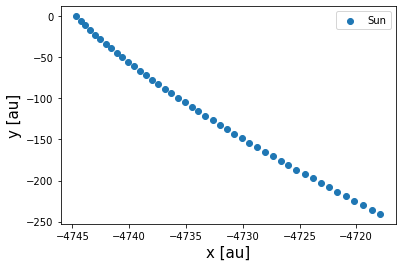

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(positionsun[:,0].value_in(units.au), 
           positionsun[:,1].value_in(units.au), label='Sun')

ax.set_xlabel('x [au]', fontsize=15)
ax.set_ylabel('y [au]', fontsize=15)

plt.legend()

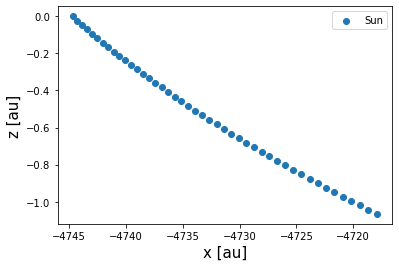

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(positionsun[:,0].value_in(units.au), 
           positionsun[:,2].value_in(units.au), label='Sun')

ax.set_xlabel('x [au]', fontsize=15)
ax.set_ylabel('z [au]', fontsize=15)

plt.legend()

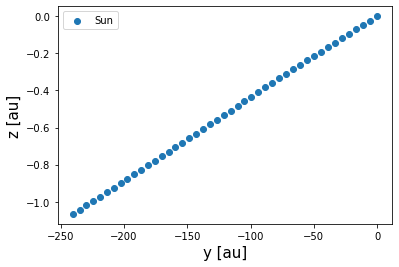

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(positionsun[:,1].value_in(units.au), 
           positionsun[:,2].value_in(units.au), label='Sun')

ax.set_xlabel('y [au]', fontsize=15)
ax.set_ylabel('z [au]', fontsize=15)

plt.legend()